In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('HR Employee Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df['PositionOutlook'] = df[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']].mean(axis=1)

yes_a = df.loc[df['Attrition'] == 'Yes']
no_a = df.loc[df['Attrition'] == 'No']
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PositionOutlook
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,2.2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2.8
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,2.8
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,3.2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,2.6


### Explore role of age on attrition

/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


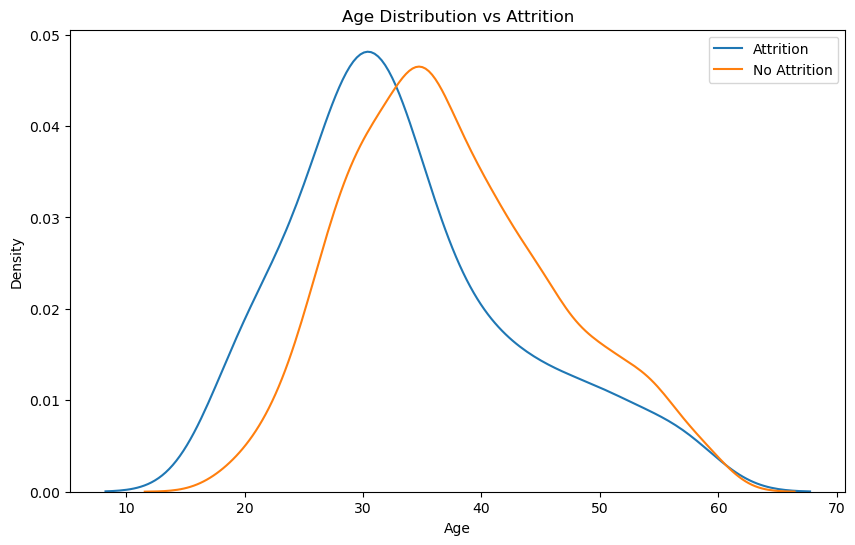

In [3]:
fig1 = plt.figure(figsize=(10,6))
sns.distplot(yes_a[['Age']],hist = False)
sns.distplot(no_a[['Age']],hist = False)
fig1.legend(labels=['Attrition','No Attrition'], bbox_to_anchor=(0.9,0.88))
plt.xlabel('Age')
plt.title('Age Distribution vs Attrition')
plt.show()

/var/folders/md/t1g4n13933qcy0dyp38vv_380000gn/T/ipykernel_76303/2032255406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_a['bin'] = pd.cut(yes_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
/var/folders/md/t1g4n13933qcy0dyp38vv_380000gn/T/ipykernel_76303/2032255406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_a['bin'] = pd.cut(no_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])


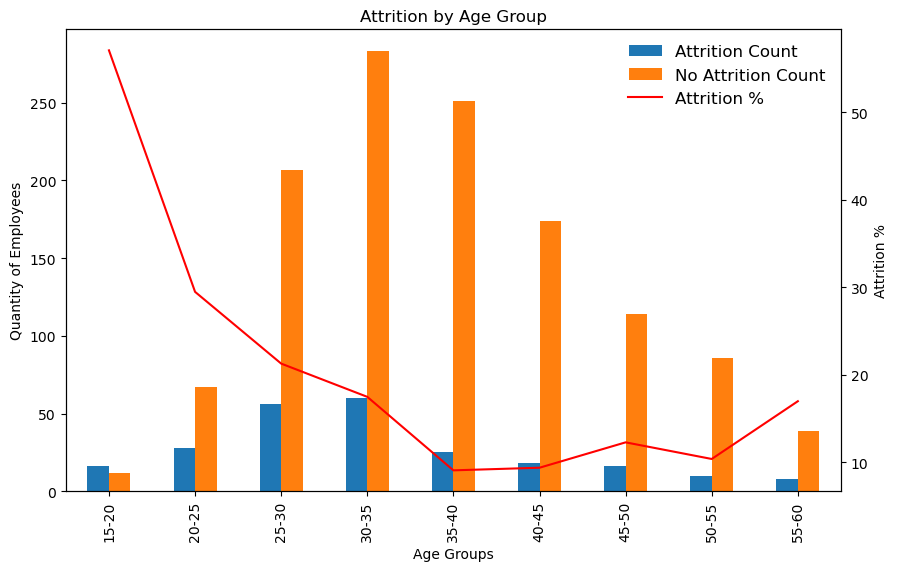

In [4]:
#quantity of employees per 5 year bin
yes_a['bin'] = pd.cut(yes_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
no_a['bin'] = pd.cut(no_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
binsa = yes_a.groupby(['bin']).count()
binsa = binsa['Age'].to_frame()
binsa = binsa.rename(columns={'Age':'Attrition Count'})
binsn = no_a.groupby(['bin']).count()
binsn = binsn['Age'].to_frame()
binsn = binsn.rename(columns={'Age':'No Attrition Count'})
bins = binsa.merge(binsn,how='outer',left_index=True,right_index=True)

binsp = bins.copy()
binsp['Attrition %'] = (100*binsp['Attrition Count']/(binsp['Attrition Count'] + binsp['No Attrition Count'])).round(1)
binsp = binsp.drop(['Attrition Count','No Attrition Count'],axis=1)


fig2, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
bins.plot.bar(ax=ax1)
binsp.plot(ax=ax2,color='red')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Quantity of Employees')
ax2.set_ylabel('Attrition %')
ax1.legend(bbox_to_anchor=(1, 1),fontsize= 'large', loc='upper right',frameon=False)
ax2.legend(bbox_to_anchor=(.92, .9),fontsize= 'large', loc='upper right',frameon=False)
plt.title('Attrition by Age Group')
plt.show()

### Gender vs Attrition

/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


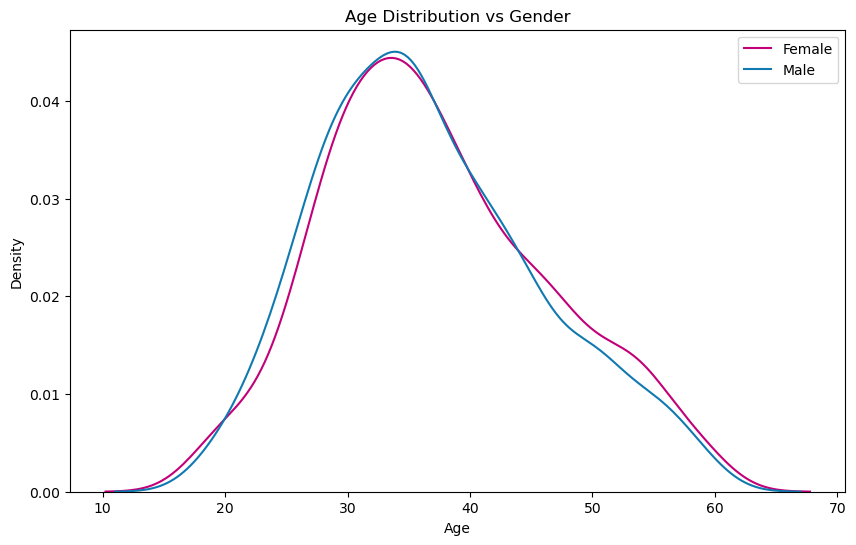

In [5]:
female = df.loc[df['Gender'] == 'Female']
male = df.loc[df['Gender'] == 'Male']

fig1 = plt.figure(figsize=(10,6))
sns.distplot(female[['Age']],hist = False,color='xkcd:magenta')
sns.distplot(male[['Age']],hist = False,color='xkcd:nice blue')
fig1.legend(labels=['Female','Male'], bbox_to_anchor=(0.9,0.88))
plt.xlabel('Age')
plt.title('Age Distribution vs Gender')
plt.show()

/var/folders/md/t1g4n13933qcy0dyp38vv_380000gn/T/ipykernel_76303/3006012981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_a['bin'] = pd.cut(female_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
/var/folders/md/t1g4n13933qcy0dyp38vv_380000gn/T/ipykernel_76303/3006012981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_a['bin'] = pd.cut(male_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
/var/folders/md/t1g4n13933qcy0dyp38vv_

<Figure size 1000x600 with 0 Axes>

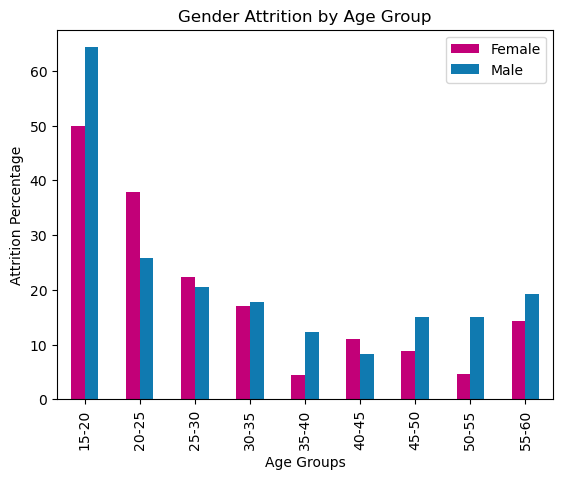

In [6]:
#quantity of employees per 5 year bin
female_a = df.loc[(df['Gender']=='Female') & (df['Attrition']=='Yes')]
male_a = df.loc[(df['Gender']=='Male') & (df['Attrition']=='Yes')]
female_n = df.loc[(df['Gender']=='Female') & (df['Attrition']=='No')]
male_n = df.loc[(df['Gender']=='Male') & (df['Attrition']=='No')]

female_a['bin'] = pd.cut(female_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
male_a['bin'] = pd.cut(male_a['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
female_n['bin'] = pd.cut(female_n['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])
male_n['bin'] = pd.cut(male_n['Age'],bins=range(15,61,5), labels = [f'{l}-{l+5}' for l in range(15,56,5)])

binsfa = female_a.groupby(['bin']).count()
binsfa = binsfa['Age'].to_frame()
binsfa = binsfa.rename(columns={'Age':'FA'})
binsfn = female_n.groupby(['bin']).count()
binsfn = binsfn['Age'].to_frame()
binsfn = binsfn.rename(columns={'Age':'FN'})

binsma = male_a.groupby(['bin']).count()
binsma = binsma['Age'].to_frame()
binsma = binsma.rename(columns={'Age':'MA'})
binsmn = male_n.groupby(['bin']).count()
binsmn = binsmn['Age'].to_frame()
binsmn = binsmn.rename(columns={'Age':'MN'})

bins2 = binsfa.merge(binsfn,how='outer',left_index=True,right_index=True).merge(
    binsma,how='outer',left_index=True,right_index=True).merge(binsmn,how='outer',left_index=True,right_index=True)
bins2['Female'] = ((100*bins2.FA)/(bins2.FA+bins2.FN)).round(1)
bins2['Male'] = ((100*bins2.MA)/(bins2.MA+bins2.MN)).round(1)
bins2
bins2 = bins2.drop(['FA','FN','MA','MN'],axis=1)

fig1 = plt.figure(figsize=(10,6))
bins2.plot.bar(color=['xkcd:magenta','xkcd:nice blue'])
plt.xlabel('Age Groups')
plt.ylabel('Attrition Percentage')
plt.title('Gender Attrition by Age Group')
plt.show()

In [7]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

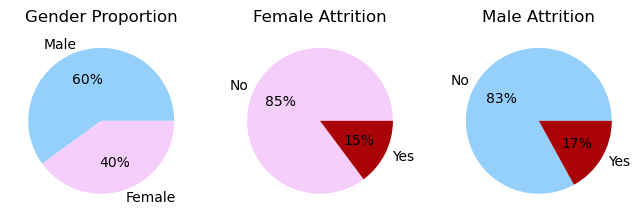

In [8]:
gcount = df['Gender'].value_counts().to_frame()
fcount = female['Attrition'].value_counts().to_frame()
mcount = male['Attrition'].value_counts().to_frame()

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(131)
ax1.pie(gcount.Gender,autopct='%1.0f%%',labels=['Male','Female'],colors=['xkcd:light blue','xkcd:very light purple'])
ax1.set_title('Gender Proportion')

ax2 = fig.add_subplot(132)
ax2.pie(fcount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:very light purple','xkcd:darkish red'])
ax2.set_title('Female Attrition')

ax3 = fig.add_subplot(133)
ax3.pie(mcount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:light blue','xkcd:darkish red'])
ax3.set_title('Male Attrition')
plt.show()


### Education Level vs Attrition

/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

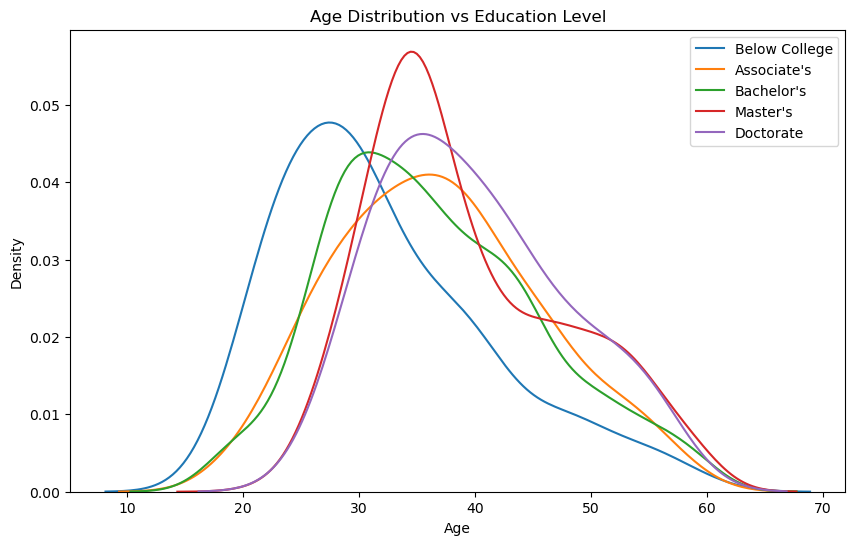

In [37]:
ed1 = df.loc[df['Education']==1]
ed2 = df.loc[df['Education']==2]
ed3 = df.loc[df['Education']==3]
ed4 = df.loc[df['Education']==4]
ed5 = df.loc[df['Education']==5]

fig1 = plt.figure(figsize=(10,6))
sns.distplot(ed1[['Age']],hist = False)
sns.distplot(ed2[['Age']],hist = False)
sns.distplot(ed3[['Age']],hist = False)
sns.distplot(ed4[['Age']],hist = False)
sns.distplot(ed5[['Age']],hist = False)

fig1.legend(labels=['Below College',"Associate's","Bachelor's","Master's",'Doctorate'], bbox_to_anchor=(0.9,0.88))
plt.xlabel('Age')
plt.title('Age Distribution vs Education Level')
plt.show()

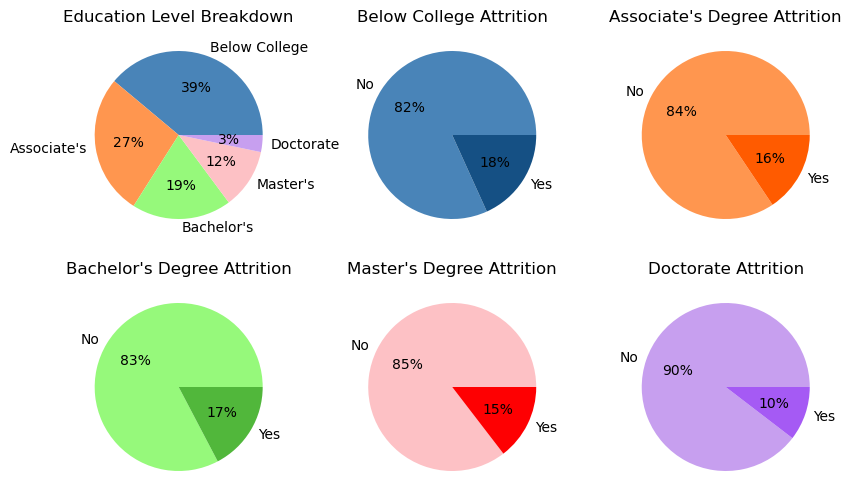

In [36]:
e1count = ed1['Attrition'].value_counts().to_frame()
e2count = ed2['Attrition'].value_counts().to_frame()
e3count = ed3['Attrition'].value_counts().to_frame()
e4count = ed4['Attrition'].value_counts().to_frame()
e5count = ed5['Attrition'].value_counts().to_frame()
edcount = df['Education'].value_counts().to_frame()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(231)
ax1.pie(edcount.Education,autopct='%1.0f%%',labels=['Below College',"Associate's","Bachelor's","Master's",'Doctorate']
        ,colors=['xkcd:cool blue','xkcd:pastel orange','xkcd:light green','xkcd:pale rose','xkcd:lavender'])
ax1.set_title('Education Level Breakdown')

ax2 = fig.add_subplot(232)
ax2.pie(e1count.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:cool blue','xkcd:light navy'])
ax2.set_title('Below College Attrition')

ax3 = fig.add_subplot(233)
ax3.pie(e2count.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:pastel orange','xkcd:bright orange'])
ax3.set_title("Associate's Degree Attrition")

ax4 = fig.add_subplot(234)
ax4.pie(e3count.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:light green','xkcd:leafy green'])
ax4.set_title("Bachelor's Degree Attrition")

ax5 = fig.add_subplot(235)
ax5.pie(e4count.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:pale rose','xkcd:fire engine red'])
ax5.set_title("Master's Degree Attrition")

ax6 = fig.add_subplot(236)
ax6.pie(e5count.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:lavender','xkcd:lighter purple'])
ax6.set_title('Doctorate Attrition')



plt.show()


### Commute Length vs Attrition

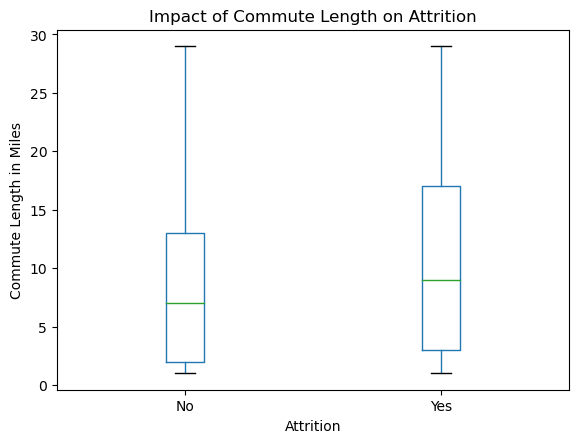

,Attrition Commute (mi),Non-Attrition Commute (mi)
count,237.0,1233.0
mean,10.6,8.9
std,8.5,8.0
min,1.0,1.0
25%,3.0,2.0
50%,9.0,7.0
75%,17.0,13.0
max,29.0,29.0


In [41]:
dist = df[['Attrition', 'DistanceFromHome']]
dist.boxplot(by = 'Attrition', column = 'DistanceFromHome', grid=False)
plt.suptitle('')
plt.title('Impact of Commute Length on Attrition')
plt.ylabel('Commute Length in Miles')
plt.show()

adist = yes_a['DistanceFromHome'].describe()
pd_distyes = adist.to_frame().round(1)
pd_distyes = pd_distyes.rename(columns={'DistanceFromHome':'Attrition Commute (mi)'})

ndist = no_a['DistanceFromHome'].describe()
pd_distno = ndist.to_frame().round(1)
pd_distno = pd_distno.rename(columns={'DistanceFromHome':'Non-Attrition Commute (mi)'})

pd.concat([pd_distyes,pd_distno], axis=1, join='inner')


In [42]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

### Business Travel

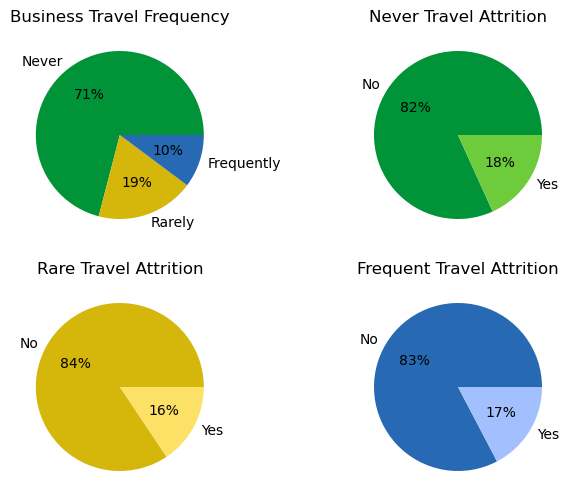

In [49]:
btn = df.loc[df['BusinessTravel']=='Non-Travel']
btr = df.loc[df['BusinessTravel']=='Travel_Rarely']
btf = df.loc[df['BusinessTravel']=='Travel_Frequently']

btncount = ed1['Attrition'].value_counts().to_frame()
btrcount = ed2['Attrition'].value_counts().to_frame()
btfcount = ed3['Attrition'].value_counts().to_frame()
btcount = df['BusinessTravel'].value_counts().to_frame()

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.pie(btcount.BusinessTravel,autopct='%1.0f%%',labels=['Never','Rarely','Frequently']
        ,colors=['xkcd:kelley green','xkcd:dark yellow','xkcd:mid blue'])
ax1.set_title('Business Travel Frequency')

ax2 = fig.add_subplot(222)
ax2.pie(btncount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:kelley green','xkcd:apple'])
ax2.set_title('Never Travel Attrition')

ax3 = fig.add_subplot(223)
ax3.pie(btrcount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:dark yellow','xkcd:sand yellow'])
ax3.set_title('Rare Travel Attrition')

ax4 = fig.add_subplot(224)
ax4.pie(btfcount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:mid blue','xkcd:pastel blue'])
ax4.set_title('Frequent Travel Attrition')

plt.show()

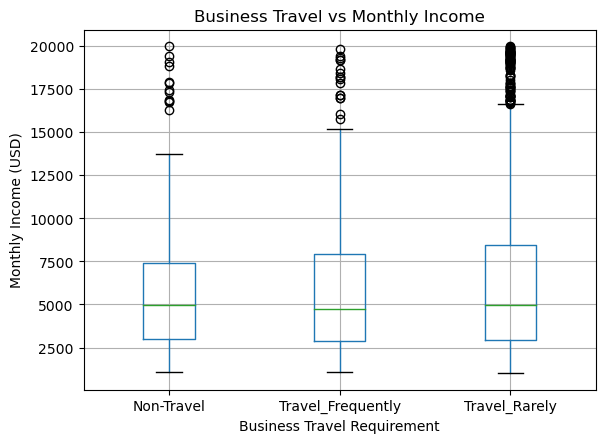

In [54]:
#Travel vs income
travelincome = df[['BusinessTravel','MonthlyIncome']]
travelincome.boxplot(by = 'BusinessTravel', column = 'MonthlyIncome')
plt.suptitle('')
plt.title('Business Travel vs Monthly Income')
plt.xlabel('Business Travel Requirement')
plt.ylabel('Monthly Income (USD)')
plt.show()

### Overtime

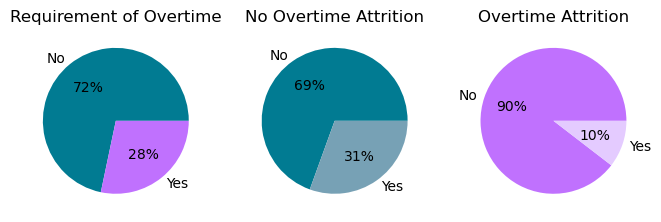

In [65]:
overyes = df.loc[df['OverTime']=='Yes']
overno = df.loc[df['OverTime']=='No']

oycount = overyes['Attrition'].value_counts().to_frame()
oncount = overno['Attrition'].value_counts().to_frame()
ocount = df['OverTime'].value_counts().to_frame()


fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(131)
ax1.pie(ocount.OverTime,autopct='%1.0f%%',labels=['No','Yes']
        ,colors=['xkcd:ocean','xkcd:easter purple'])
ax1.set_title('Requirement of Overtime')

ax2 = fig.add_subplot(132)
ax2.pie(oycount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:ocean','xkcd:greyblue'])
ax2.set_title('No Overtime Attrition')

ax3 = fig.add_subplot(133)
ax3.pie(oncount.Attrition,autopct='%1.0f%%',labels=['No','Yes'],colors=['xkcd:easter purple','xkcd:pale lilac'])
ax3.set_title('Overtime Attrition')

plt.show()

### Income

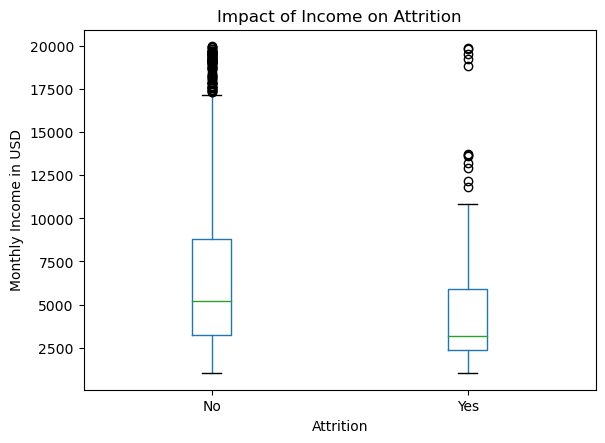

In [66]:
minc = df[['Attrition', 'MonthlyIncome']]
minc.boxplot(by = 'Attrition', column = 'MonthlyIncome',grid=False)
plt.suptitle('')
plt.title('Impact of Income on Attrition')
plt.ylabel('Monthly Income in USD')
plt.show()

In [67]:
ainc = yes_a['MonthlyIncome'].describe()
pd_ainc = ainc.to_frame().round(1)
pd_ainc = pd_ainc.rename(columns={'MonthlyIncome':'Attrition Monthly Income (USD)'})

ninc = no_a['MonthlyIncome'].describe()
pd_ninc = ninc.to_frame().round(1)
pd_ninc = pd_ninc.rename(columns={'MonthlyIncome':'Non-Attrition Monthly Income (USD)'})

pd_inc = pd.concat([pd_ainc,pd_ninc], axis=1, join='inner')
pd_inc

,Attrition Monthly Income (USD),Non-Attrition Monthly Income (USD)
count,237.0,1233.0
mean,4787.1,6832.7
std,3640.2,4818.2
min,1009.0,1051.0
25%,2373.0,3211.0
50%,3202.0,5204.0
75%,5916.0,8834.0
max,19859.0,19999.0


### Position Outlook

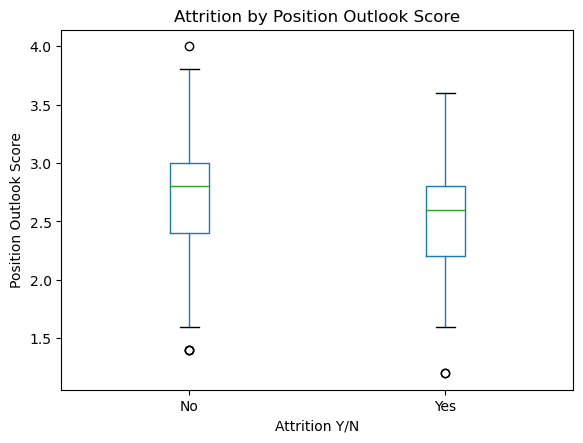

,Attrition Position Outlook,Non-Attrition Position Outlook
count,237.0,1233.0
mean,2.5,2.8
std,0.5,0.4
min,1.2,1.4
25%,2.2,2.4
50%,2.6,2.8
75%,2.8,3.0
max,3.6,4.0


In [69]:
#Overview on position outlook on attrition
po_box = df[['PositionOutlook', 'Attrition']]
po_box.boxplot(by = 'Attrition', column = 'PositionOutlook',grid=False)
plt.suptitle('')
plt.title('Attrition by Position Outlook Score')
plt.xlabel('Attrition Y/N')
plt.ylabel('Position Outlook Score')
plt.show()

apo = yes_a['PositionOutlook'].describe()
pd_apo = apo.to_frame().round(1)
pd_apo = pd_apo.rename(columns={'PositionOutlook':'Attrition Position Outlook'})

npo = no_a['PositionOutlook'].describe()
pd_npo = npo.to_frame().round(1)
pd_npo = pd_npo.rename(columns={'PositionOutlook':'Non-Attrition Position Outlook'})

pd_po = pd.concat([pd_apo,pd_npo], axis=1, join='inner')
pd_po